In [70]:
import sys
print(sys.executable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning, message='.*gpu_id.*')
warnings.filterwarnings(action='ignore', category=UserWarning, message='.*gpu_hist.*')

file_path = r"2.0Final_Preprocessed_Data.csv"
data = pd.read_csv(file_path)

data = data.drop(columns=['PINCP'])

X = data.drop(columns=['poverty_status'])
Y = data['poverty_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

param_grid =  {
    'n_estimators': [390],             
    'max_depth': [8],   
    'learning_rate': [0.1],   
    'min_child_weight': [2],
  'gamma': [0], 
    'subsample': [1],
    'colsample_bytree': [0.6],
    'colsample_bylevel': [1],
    'colsample_bynode': [1],
   'reg_alpha': [10],
    'reg_lambda': [5],
    'max_delta_step': [0],
    'scale_pos_weight': [1]
}

xgb_model = xgb.XGBClassifier(random_state=18, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_xgb_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

train_predictions = best_xgb_model.predict(X_train)

train_accuracy = accuracy_score(Y_train, train_predictions)
train_precision = precision_score(Y_train, train_predictions)
train_recall = recall_score(Y_train, train_predictions)
train_f1 = f1_score(Y_train, train_predictions)
train_conf_matrix = confusion_matrix(Y_train, train_predictions)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"Confusion Matrix: \n{train_conf_matrix}")

predictions = best_xgb_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)

print("Testing Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")

/opt/anaconda3/bin/python
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 390, 'reg_alpha': 10, 'reg_lambda': 5, 'scale_pos_weight': 1, 'subsample': 1}
Training Metrics:
Accuracy: 0.7881888055104441
Precision: 0.8027557749696054
Recall: 0.7634939100452717
F1 Score: 0.7826327453494679
Confusion Matrix: 
[[116249  26769]
 [ 33748 108946]]
Testing Metrics:
Accuracy: 0.7699501596012768
Precision: 0.7861768515247851
Recall: 0.7444531162894414
F1 Score: 0.7647463062650326
Confusion Matrix: 
[[28288  7264]
 [ 9168 26708]]


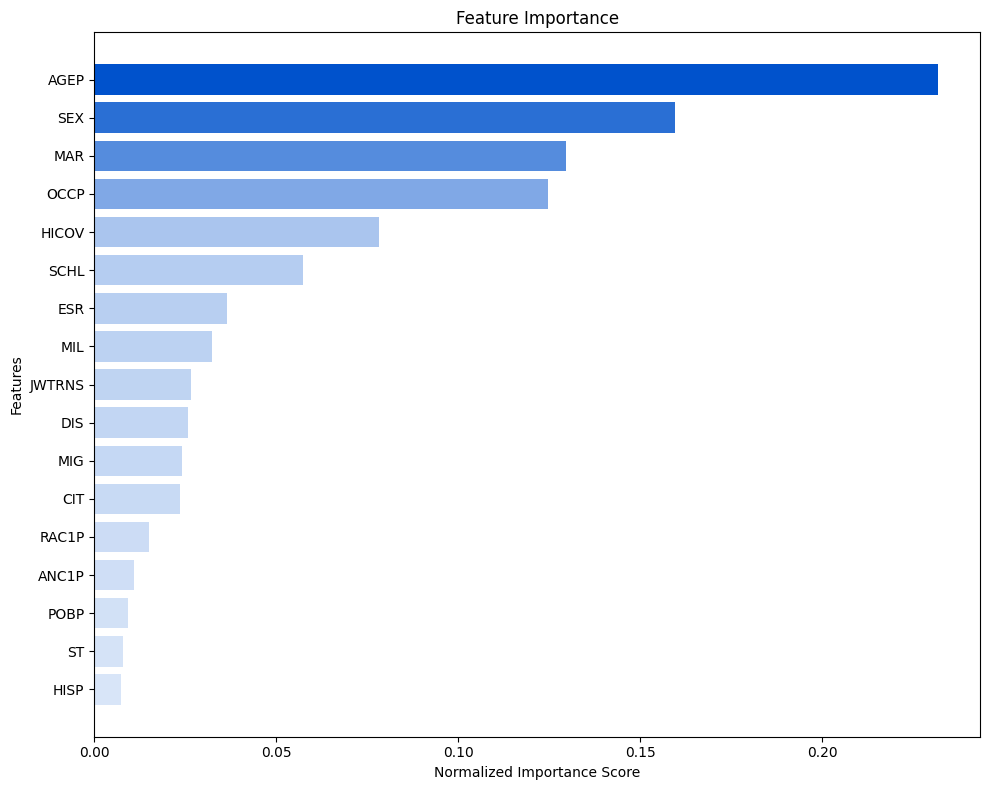

Feature Importances:
AGEP: 0.2317
SEX: 0.1595
MAR: 0.1297
OCCP: 0.1246
HICOV: 0.0781
SCHL: 0.0574
ESR: 0.0364
MIL: 0.0323
JWTRNS: 0.0265
DIS: 0.0258
MIG: 0.0240
CIT: 0.0236
RAC1P: 0.0150
ANC1P: 0.0110
POBP: 0.0092
ST: 0.0080
HISP: 0.0074


In [71]:
# Feature Importance Plot
import matplotlib.pyplot as plt
base_color = '#0052cc'  # Cobalt blue

def lighten_color(color, amount):
    import matplotlib.colors as mcolors
    c = np.array(mcolors.to_rgb(color))
    white = np.array([1, 1, 1])
    return mcolors.to_hex((1 - amount) * c + amount * white)

# Assuming best_xgb_model is the final trained model
if hasattr(best_xgb_model, 'feature_importances_'):
    feature_importance = best_xgb_model.feature_importances_
    total_importance = sum(feature_importance)
    normalized_importance = feature_importance / total_importance

    indices = np.argsort(normalized_importance)[::-1]
    names = [X.columns[i] for i in indices]

    num_features = len(normalized_importance)
    first_five_shades = [lighten_color(base_color, amount=i/6) for i in range(5)]
   
    last_first_shade = lighten_color(first_five_shades[-1], amount=0.1)
    remaining_shades = [lighten_color(last_first_shade, amount=(i-4)/(num_features-5)*0.5) for i in range(5, num_features)]
    bar_colors = first_five_shades + remaining_shades

    plt.figure(figsize=(10, 8))
    plt.title("Feature Importance")
    plt.barh(range(len(normalized_importance)), normalized_importance[indices], align='center', color=bar_colors)
    plt.yticks(range(len(normalized_importance)), names)
    plt.xlabel('Normalized Importance Score')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.tight_layout()
    plt.show()

    print("Feature Importances:")
    for name, importance in zip(names, normalized_importance[indices]):
        print(f"{name}: {importance:.4f}")
else:
    print("The selected model does not provide feature importances.")

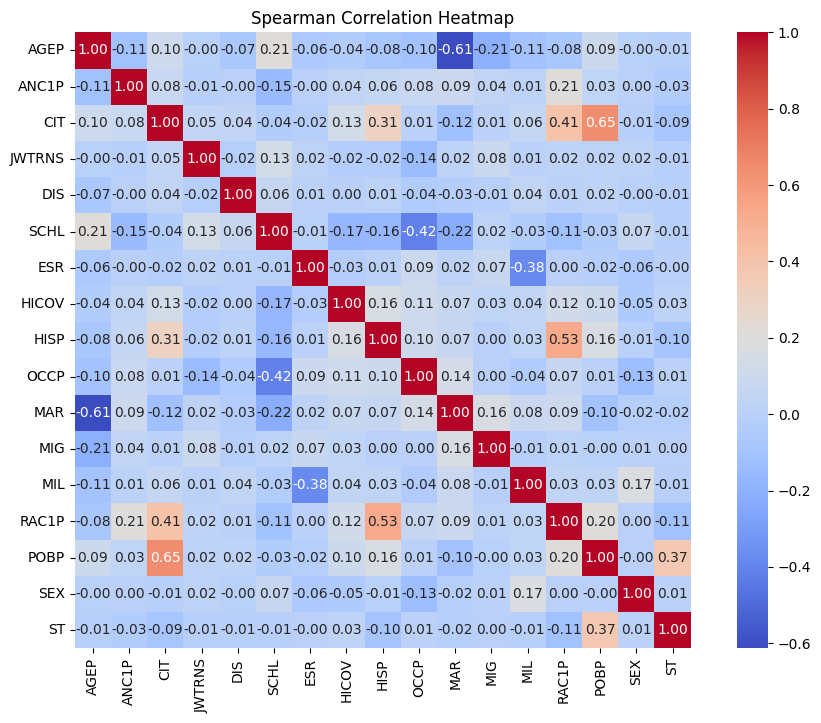

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = r"2.0Final_Preprocessed_Data.csv"
data = pd.read_csv(file_path)

# Drop the PINCP column
data = data.drop(columns=['PINCP'])

# Split features
X = data.drop(columns=['poverty_status'])

# Calculate Spearman correlation
spearman_corr = X.corr(method='spearman')

# Plot the Spearman correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Spearman Correlation Heatmap")
plt.show()